This page gives you the actual data from Terri Kneeland's experiment on the ring game.  The problem is to figure out whether there is any difference between a player who can successfully delete dominated strategies, and a player who best replies to the actual distrbution of play by other players in the experiment.


Apart from providing the data, this page will show you some simple python commands you can use to interpret the data. Then we can do some computations using sagemath.


The first bit just loads some python libraries (particularly pandas - tons of documentation about it on the internet).  The os library is for reading files.

In [1]:
import pandas as pd
import os
dataset = pd.read_csv('ecma_data.csv')

In [2]:
show(dataset)

You can find Terri's experiment at [https://montoya.econ.ubc.ca/Econ306/terri_experiment.pdf](https://montoya.econ.ubc.ca/Econ306/terri_experiment.pdf).  In the game described in that experiment, each of the lettered actions are replaced by a number, either 1,2 or 3.  For example, when a subject is playing as Player 4 in game 1, the actions k,l,m are replaced by 1,2,3 in the table above. 


Now list the columns that are contained in the table so you know how to refer to them.  You use the letters contained between the single quotes.

In [3]:
dataset.columns

Index([u'Subject', u'G1P1', u'G1P2', u'G1P3', u'G1P4', u'G2P1', u'G2P2',
       u'G2P3', u'G2P4'],
      dtype='object')

One way to visualize the data is to draw a histogram of the data in the column named 'G1P4', which gives the choices that the subjects made playing as Player 4 in game 1.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33a5f9b150>]],
      dtype=object)

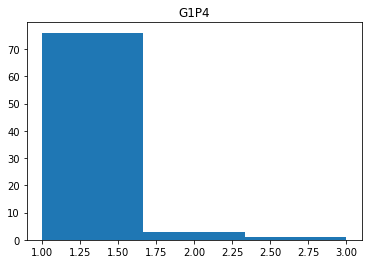

In [4]:
dataset.hist('G1P4',bins=3,grid=false)

A better way to do it here is this way.

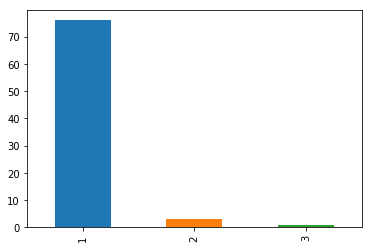

In [5]:
dataset['G1P4'].value_counts().plot(kind='bar')


Of course, we need the raw counts here, so we could also do:

In [6]:
ds = dataset['G1P4'].value_counts(normalize=true)
show(ds) 


Or, if you just want the counts themselves, you would do it this way.

In [7]:
dataset['G1P4'].value_counts()

1    76
2     3
3     1
Name: G1P4, dtype: int64

If you can't see from the code, those are counts of the number of subjects who chose actions 1, 2 or 3 (k,l or m) when they were playing as Player 4 in game 1.  Recall the dominant strategy was action k, or 1.  Most people did that.


Now what we would like to do is to look at subjects who acting as Player 3 and calculate the best reply against this empirical distribution.  Theoretically, a Nash equilibrium is supposed to have the property that each player correctly guesses the probablity with which their opponent will take each of his or her possible actions. If $\pi_1, \pi_2$ and $1-\pi_1-\pi_2$ are the probabilities with which subjects in the rest of the group use action 1(k) or 2(1) or 3(m), then we would use the calculation 
$$
20\pi_1 + 14\pi_2 +8(1-\pi_1-\pi_2)
$$ 
to be the expected payoff associated with using action 1(h).  A similar calculation applies to the other two actions 2 and 3 (j or k in the reading).


Now revert to sagemath to do the calculation as follows.

In [8]:
n((76/80)*20+(3/80)*14+(1/80)*8)

19.6250000000000

If you leave out the n() you get the answer as a fraction.  Now we can do the same thing for action i (2):

In [9]:
n((76/80)*16+(3/80)*2+(1/80)*18)

15.5000000000000

Evidently, the best reply to the distribution of actions of the other subjects is the same as the action you get from iterated deletion of dominated strategies, at least when you are playing as Player 3.  The problem is to figure out whether this is true for the Players in the other positions and whether it is true for both games.  Use the sample code here to figure out an answer. 

The second part of this project is to try to test an alternative model with this data.  In particular, we'll assume that players just lose interest sometimes, otherwise, they find their actions using iterated deletion of dominated strategies. To illustrate, suppose you are acting as player 3, and you believe that player 4 will play his or her dominant action with probability $\rho_4$.  With probability $1-\rho_4$, you believe the player just chooses each of his or her actions with equal probability. 


As above, this means your payoff when you play action 1(h) is
$$
20\rho_1+(1-\rho_1)(\frac{20+14+8}{3})
$$


What you need to try to figure out is two things. What value of $\rho_1$ makes the realized distribution of outcomes {76,3,1} most likely?  Second how high does $\rho_1$ have to be in order that action 2 becomes a best reply.


In particular, for this second question, the payoff to using action 2 is
$$
16\rho_1+(1-\rho_1)\frac{16+2+18}{3}
$$
What value of $\rho_1$ makes this the same as the payoff to action 1 described above.  If $\rho$ takes this value, what is the probability that the realized data would come out the way it did.


Of course, we would like to know these same things for the other players.  To do this, it seems reasonable to assume that the probability $\rho_3$ that applies when player 2 is thinking about player 3 is different than $\rho_4$.  Intuitively it would seem it should be a little higher, but that is to be checked by looking at the data.  Assume when you do this that the probability that a player is inattentive as Player 3 is independent of whether they were independent as player 4.

____________________________
__Problem 1__:

Let's first try to examine if the best expected payoff is the same as the action we would get from iterated deletion of dominated strategy. If player 4 plays 1(k) with probability $\pi_1$, 2(l) with probability $\pi_2$ and 3(m) with probability $(1-\pi_1 - \pi_2)$, the expectd payoff for player 3 playing action 3(j) would be:
$$
16\pi_2+16(1-\pi_1 - \pi_2)
$$

Now let's use the data to replace for the values of $\pi_1$, $\pi_2$ and $(1-\pi_1-\pi_2)$.

In [10]:
(3/80)*16+(1/80)*16

4/5

In [11]:
n((3/80)*16+(1/80)*16)

0.800000000000000

As predicted, computing the third expected payoff yields the same conclusion. The best response you have is the same that the one you obtain by the iteratede deletion of dominated strategies.

We need to describe the data for other players and other games. Let's start with Player 3 in Game 1.

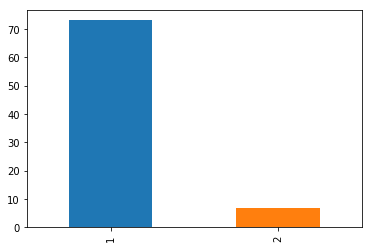

In [12]:
dataset['G1P3'].value_counts().plot(kind='bar')

It is possible to note that no player chose to play j(3), which had the lowest expected payoff when playing as Player 3.

In [13]:
dataset['G1P3'].value_counts()

1    73
2     7
Name: G1P3, dtype: int64

Now that we have the proportions, we will have a look at the expected payoffs of Player 2. Let's denote $\phi$ the probability that Player 3 plays 1(h) and $(1-\phi)$ the probaility that Player 3 plays i(2).

We thus have the following:
$$
\phi = \frac{73}{80}
$$
$$
(1-\phi) = \frac{7}{80}
$$

Replacing in our expectations for Player 2 yields:

In [14]:
(73/80)*14+(7/80)*18

287/20

In [15]:
n((73/80)*14+(7/80)*18)

14.3500000000000

For option 1(d), then:

In [16]:
(73/80)*20+(7/80)*8

379/20

In [17]:
n((73/80)*20+(7/80)*8)

18.9500000000000

For option 2(e), and finally:

In [18]:
(73/80)*0+(7/80)*16

7/5

In [19]:
n((73/80)*0+(7/80)*16)

1.40000000000000

For option 3(f). As in the case of Player 3, the best response for Player 2 is e(2), which is the same than the one obtained by iterated deletion of dominated strategies.

Finally, we can repeat the same process for Player 1 and the answers of Player 2.

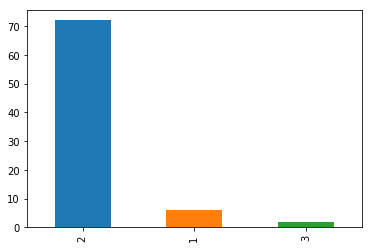

In [20]:
dataset['G1P2'].value_counts().plot(kind='bar')

In [21]:
dataset['G1P2'].value_counts()

2    72
1     6
3     2
Name: G1P2, dtype: int64

A majority of subjects chosed to play 2(e) which was the best response for Player 2.
Denoting $\gamma_1$, $\gamma_2$ and $(1-\gamma_1-\gamma_2)$ the probabilities with which Player 2 played respectively options 1(d), 2(e) and 3(f), we have:
$$
\gamma_1 = \frac{6}{80}
$$
$$
\gamma_2 = \frac{72}{80}
$$
$$
(1-\gamma_1-\gamma_2) = \frac{2}{80}
$$


In [22]:
n((6/80)*8+(72/80)*20+(2/80)*12) #For option 1(a)#

18.9000000000000

In [23]:
n((6/80)*0+(72/80)*8+(2/80)*16) #For option 2(b)#

7.60000000000000

In [24]:
n((6/80)*18+(72/80)*12+(2/80)*6) #For option 3(c)#

12.3000000000000

Note that the highest payoff is for option 1(a) which is also the best response. For Game 1, the answers you get by computing expected payoffs is the same as the answer you would obtain by iterated deletion of dominated strategies.

_____________________________________

__Problem 2__


In [25]:
#Given the rho that we have, what's the probability that the outcome comes exactly as 76,3 and 1 (binomials). We then want to find the $\rho_4$ that make this distribution possible. ie if each of them play dominant strategy with probability $\rho_4$, what is the probability that exactly 76 of them play the dominant strategy. Verify if the probability to play the dominant strategy increases/decreases as the players approach Player 1.#

We will examine the probability $\rho_4$ such as exactly 76 people play the dominant strategy. This can be represented by a Bernoulli experiment with probability of success $\rho_4$.

In [26]:
var ('rho_4')
sol = solve(rho_4*80+(1-rho_4)*(1/3)*80 == 76, rho_4)
show (sol[0])

If we consider that $\rho_4 = \frac{37}{40}$, then our probability of 76 successes in 80 trials is:
$$
C_{80}^{76} \rho_4^{76} (1-\rho_4)^{80-76}
$$

The probability mass function is given by:
$$
f(\Pi) = C_n^y \Pi^y (1-\Pi)^{n-y}
$$

Where $\Pi$ is the probability we are looking for (i.e. the probability to play the dominant strategy).
As we are considering people that play the dominant strategy deliberately and inadvertly, we will have 
$$\Pi = \rho_4+\frac{1-\rho_4}{3}
$$

In [27]:
n((37/40)*80)

74.0000000000000

The code below will allow us to compute binomial coefficients by using the command __"choose(n,k)"__:

In [28]:
def choose(n, k):
    if 0 <= k <= n:
        ntok = 1
        ktok = 1
        for t in xrange(1, min(k, n - k) + 1):
            ntok *= n
            ktok *= t
            n -= 1
        return ntok // ktok
    else:
        return 0

In [29]:
choose(7,2)

21

In [30]:
var('rho_4')
binom = choose(80,76)
show(binom)

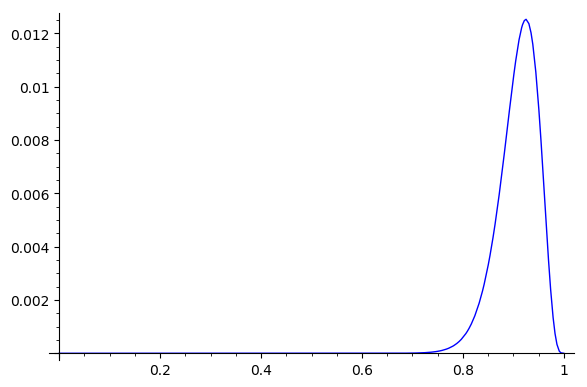

In [31]:
var('rho_4')
eq1 = (binom)*((rho_4+(1-rho_4)*(1/3))^(76))*(((1-rho_4)*(1/3))^4)
show(eq1)
plot(eq1,rho_4,0,1)

Noting that the cumulative distribution sums up to 1, we have a probability distribution. Let's zoom in a bit:

In [32]:
plot (eq1,rho_4,0.5,1)

In order to determine the maximum value of $\rho_4$, we need to take the first order condition and set the first derivative of $f(\Pi)$ equal to 0.

In [33]:
d = eq1.derivative(rho_4)
show(d)
prob4 = solve(d == 0,rho_4)
show(prob4)

We now need to repeat the process for every Player. Let's denote $\rho_3$ the probability that Player 3 plays his dominant strategy, $\rho_2$ the probability that Player 2 plays his dominant strategy, and $\rho_1$ the same probability for Player 1. The formula of $\Pi$ applies for every Player.

In [34]:
var('rho_3')
eq2 = (choose(80,73))*((rho_3+(1-rho_3)*(1/3))^(73))*(((1-rho_3)*(1/3))^(80-73))
show(eq2)
plot(eq2,rho_3,0.5,1)

In [35]:
d1 = eq2.derivative(rho_3)
show(d1)
prob3 = solve(d1==0,rho_3)
show(prob3)

In [36]:
var('rho_2')
eq3 = (choose(80,72))*((rho_2+(1-rho_2)*(1/3))^(72))*(((1-rho_2)*(1/3))^(80-72))
show(eq3)
plot(eq3,rho_2,0.5,1)

In [37]:
d2 = eq3.derivative(rho_2)
show(d2)
prob2 = solve(d2==0,rho_2)
show(prob2)

We will need some data for Player 1:

1    66
3    12
2     2
Name: G1P1, dtype: int64

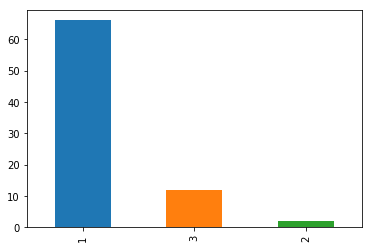

In [38]:
dataset['G1P1'].value_counts().plot(kind='bar')
dataset['G1P1'].value_counts()

In [39]:
var('rho_1')
eq4 = (choose(80,66))*((rho_1+(1-rho_1)*(1/3))^(66))*(((1-rho_1)*(1/3))^(80-66))
show(eq4)
plot(eq4,rho_1,0.4,1)

In [40]:
d3 = eq4.derivative(rho_1)
show(d3)
prob1 = solve(d3==0,rho_1)
show(prob1)

Summarising the results for Game 1, excluding the negative and $1$ results, we have:
$$
\rho_4 = \frac{37}{40}
$$

$$
\rho_3 = \frac{139}{160}
$$

$$
\rho_2 = \frac{17}{20}
$$

$$
\rho_1 = \frac{59}{80}
$$

In [41]:
n(37/40)

0.925000000000000

In [42]:
n(139/160)

0.868750000000000

In [43]:
n(17/20)

0.850000000000000

In [44]:
n(59/80)

0.737500000000000

Note how the probability of playing the best response diminishes as subjects approach Player 1 in Game 1.

In [45]:
n(157/160)

0.981250000000000

In [46]:
n(109/160)

0.681250000000000

In [47]:
n(17/80)

0.212500000000000

In [48]:
n(19/160)

0.118750000000000

Note how the decrease is much sharper in Game 2 than in Game 1.

In [78]:
############### From now on these are tests to confirm some values and formulas #################

In [52]:
dataset['G1P4'].value_counts()

1    76
2     3
3     1
Name: G1P4, dtype: int64

In [53]:
dataset['G1P3'].value_counts()

1    73
2     7
Name: G1P3, dtype: int64

In [54]:
dataset['G1P2'].value_counts()

2    72
1     6
3     2
Name: G1P2, dtype: int64

In [55]:
dataset['G1P1'].value_counts()

1    66
3    12
2     2
Name: G1P1, dtype: int64

In [61]:
############ Game 2

In [57]:
dataset['G2P4'].value_counts()

3    79
2     1
Name: G2P4, dtype: int64

In [58]:
dataset['G2P3'].value_counts()

2    63
1    13
3     4
Name: G2P3, dtype: int64

In [59]:
dataset['G2P2'].value_counts()

2    38
1    38
3     4
Name: G2P2, dtype: int64

In [60]:
dataset['G2P1'].value_counts()

1    45
3    33
2     2
Name: G2P1, dtype: int64

In [65]:
var('pi_3')
test = (factorial(80)/factorial(63)*factorial(13)*factorial(4))*((pi_3+(1-pi_3)*(1/3))^(63))*(((1-pi_3)*(1/3))^(13))*(((1-pi_3)*(1/3))^(4))
show(test)
dtest = test.derivative(pi_3)
soltest = solve(dtest==0,pi_3)
show(soltest)

In [67]:
var('pi_2')
test2 = (factorial(80)/factorial(38)*factorial(38)*factorial(4))*((pi_2+(1-pi_2)*(1/3))^(38))*(((1-pi_2)*(1/3))^(38))*(((1-pi_2)*(1/3))^(4))

In [74]:
var('pi_1')
test3 = (factorial(80)/factorial(45)*factorial(33)*factorial(2))*((pi_1+(1-pi_1)*(1/3))^(33))*(((1-pi_1)*(1/3))^(45))*(((1-pi_1)*(1/3))^(2))

In [75]:
dtest2 = test2.derivative(pi_2)
soltest2 = solve(dtest2==0,pi_2)
dtest3 = test3.derivative(pi_1)
soltest3 = solve(dtest3==0,pi_1)
show(soltest2)
show(soltest3)

In [73]:
n(11/32)

0.343750000000000

In [76]:
var('alpha')
eqref = (choose(80,33))*((alpha+(1-alpha)*(1/3))^(33))*(((1-alpha)*(1/3))^(80-33))
ddd = eqref.derivative(alpha)
sold = solve(ddd==0,alpha)
show(sold)